In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Load your stock data into a pandas DataFrame ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = pd.read_excel('master_data.xlsx')
df

,Date,NDX_Open,NDX_High,NDX_Low,NDX_Close,NDX_Volume,NDX_News_Sentiment_Score,NDX_Twitter_Sentiment_Score,SP_Open,SP_Close,SP_High,SP_Low,SP_Volume,SP_News_Sentiment_Score,SP_Twitter_Sentiment_Score
0,2024-09-26,20273.30,20116.48,20273.30,19966.99,1,-0.007133,-0.014985,5762.22,5745.47,5767.37,5721.01,1,-0.007512,-0.024673
1,2024-09-25,19922.28,19972.61,20043.43,19921.22,83318,0.008264,0.008256,5733.65,5722.26,5741.03,5712.06,178562,0.015739,0.003237
2,2024-09-24,19917.56,19944.84,19984.47,19739.67,89451,0.013232,-0.005248,5727.66,5732.93,5735.32,5698.99,182050,0.013249,-0.003862
3,2024-09-23,19848.71,19852.20,19892.78,19797.82,80504,-0.003054,0.013247,5711.90,5718.57,5725.36,5704.22,167785,-0.002882,0.013097
4,2024-09-20,19816.29,19791.49,19845.70,19632.73,114619,0.024494,0.003260,5709.64,5702.55,5715.14,5674.49,248770,0.027327,0.007773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,2015-01-08,4195.49,4240.55,4247.93,4192.63,60953,0.038551,0.018716,2030.61,2062.14,2064.08,2030.61,206881,0.035358,0.009673
2446,2015-01-07,4139.85,4160.00,4169.97,4126.39,59346,0.024996,-0.008784,2005.55,2025.90,2029.61,2005.55,195982,0.029824,-0.020919
2447,2015-01-06,4174.78,4110.83,4176.26,4090.33,63371,0.025765,-0.003190,2022.15,2002.61,2030.25,1992.44,241138,0.027856,-0.013235
2448,2015-01-05,4206.55,4160.96,4210.96,4151.85,53587,0.035583,0.007654,2054.44,2020.58,2054.44,2017.34,201433,0.037774,0.010465


In [ ]:
df = df[['Date', 'NDX_Open', 'NDX_High', 'NDX_Low',	'NDX_Close',	'NDX_Volume',	'NDX_News_Sentiment_Score',	'NDX_Twitter_Sentiment_Score']]
df

,Date,NDX_Open,NDX_High,NDX_Low,NDX_Close,NDX_Volume,NDX_News_Sentiment_Score,NDX_Twitter_Sentiment_Score
0,2024-09-26,20273.30,20116.48,20273.30,19966.99,1,-0.007133,-0.014985
1,2024-09-25,19922.28,19972.61,20043.43,19921.22,83318,0.008264,0.008256
2,2024-09-24,19917.56,19944.84,19984.47,19739.67,89451,0.013232,-0.005248
3,2024-09-23,19848.71,19852.20,19892.78,19797.82,80504,-0.003054,0.013247
4,2024-09-20,19816.29,19791.49,19845.70,19632.73,114619,0.024494,0.003260
...,...,...,...,...,...,...,...,...
2445,2015-01-08,4195.49,4240.55,4247.93,4192.63,60953,0.038551,0.018716
2446,2015-01-07,4139.85,4160.00,4169.97,4126.39,59346,0.024996,-0.008784
2447,2015-01-06,4174.78,4110.83,4176.26,4090.33,63371,0.025765,-0.003190
2448,2015-01-05,4206.55,4160.96,4210.96,4151.85,53587,0.035583,0.007654


In [ ]:
# sort the data by date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

# Create the target column for next day's Close price
df['Next_Day_Close'] = df['NDX_Close'].shift(-1)

# Drop the last row as it doesn't have a target
df = df[:-1]

# Features and Target
X = df[['NDX_Open', 'NDX_High', 'NDX_Low',	'NDX_Close',	'NDX_Volume',	'NDX_News_Sentiment_Score',	'NDX_Twitter_Sentiment_Score']]
y = df['Next_Day_Close']  # Target is next day's Close price

# Split data into training and testing sets
split_index = int(len(X) * 0.9)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

<ipython-input-21-02de040ec1e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-21-02de040ec1e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Date', inplace=True)
<ipython-input-21-02de040ec1e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

In [ ]:
# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 1637.98
R^2 Score: -0.72
Mean Squared Error (MSE): 4081911.27
Root Mean Squared Error (RMSE): 2020.37


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
y_pred_np = y_pred.reshape(-1, 1)
y_test_np = y_test.values.reshape(-1, 1)

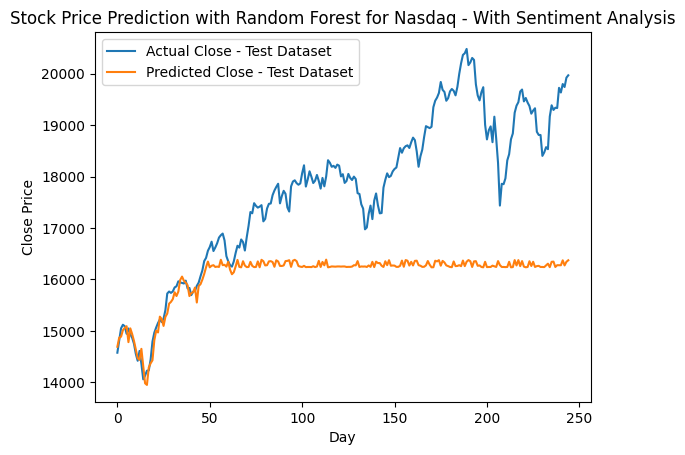

In [ ]:
plt.plot(y_test_np, label='Actual Close - Test Dataset')
plt.plot(y_pred_np, label='Predicted Close - Test Dataset')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction with Random Forest for Nasdaq - With Sentiment Analysis')
plt.legend()
plt.show()

In [ ]:
df = pd.read_excel('master_data.xlsx')
df = df[['Date', 'SP_Open',	'SP_Close',	'SP_High',	'SP_Low',	'SP_Volume',	'SP_News_Sentiment_Score',	'SP_Twitter_Sentiment_Score']]
df

,Date,SP_Open,SP_Close,SP_High,SP_Low,SP_Volume,SP_News_Sentiment_Score,SP_Twitter_Sentiment_Score
0,2024-09-26,5762.22,5745.47,5767.37,5721.01,1,-0.007512,-0.024673
1,2024-09-25,5733.65,5722.26,5741.03,5712.06,178562,0.015739,0.003237
2,2024-09-24,5727.66,5732.93,5735.32,5698.99,182050,0.013249,-0.003862
3,2024-09-23,5711.90,5718.57,5725.36,5704.22,167785,-0.002882,0.013097
4,2024-09-20,5709.64,5702.55,5715.14,5674.49,248770,0.027327,0.007773
...,...,...,...,...,...,...,...,...
2445,2015-01-08,2030.61,2062.14,2064.08,2030.61,206881,0.035358,0.009673
2446,2015-01-07,2005.55,2025.90,2029.61,2005.55,195982,0.029824,-0.020919
2447,2015-01-06,2022.15,2002.61,2030.25,1992.44,241138,0.027856,-0.013235
2448,2015-01-05,2054.44,2020.58,2054.44,2017.34,201433,0.037774,0.010465


In [ ]:
# sort the data by date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

# Create the target column for next day's Close price
df['Next_Day_Close'] = df['SP_Close'].shift(-1)

# Drop the last row as it doesn't have a target
df = df[:-1]

# Features and Target
X = df[['SP_Open',	'SP_Close',	'SP_High',	'SP_Low',	'SP_Volume',	'SP_News_Sentiment_Score',	'SP_Twitter_Sentiment_Score']]
y = df['Next_Day_Close']  # Target is next day's Close price

# Split data into training and testing sets
split_index = int(len(X) * 0.9)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]s

In [ ]:
# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 404.15
R^2 Score: -0.49
Mean Squared Error (MSE): 257243.40
Root Mean Squared Error (RMSE): 507.19


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
y_pred_np = y_pred.reshape(-1, 1)
y_test_np = y_test.values.reshape(-1, 1)

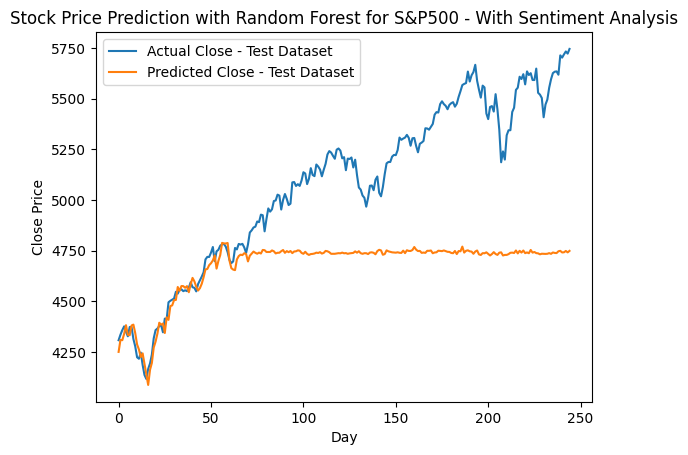

In [ ]:
plt.plot(y_test_np, label='Actual Close - Test Dataset')
plt.plot(y_pred_np, label='Predicted Close - Test Dataset')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction with Random Forest for S&P500 - With Sentiment Analysis')
plt.legend()
plt.show()